<a href="https://colab.research.google.com/github/blewis219/top-5-film-directors/blob/main/Top_Film_Directors_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
# Import libraries
import pandas as pd
import numpy as np

In [174]:
# Read in datasets
titles = pd.read_csv('IMDb title_principals.csv')
titles.head()

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000009,1,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,2,nm0183823,actor,NaN,"[""Mr. Hamilton""]"
2,tt0000009,3,nm1309758,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
3,tt0000009,4,nm0085156,director,NaN,NaN
4,tt0000574,1,nm0846887,actress,NaN,"[""Kate Kelly""]"


In [175]:
# Read in our second dataset
names = pd.read_csv('IMDb names.csv')
names.head(20)

,imdb_name_id,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
0,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2,0,1,2
1,nm0000002,Lauren Bacall,Betty Joan Perske,174.0,Lauren Bacall was born Betty Joan Perske on Se...,"September 16, 1924 in The Bronx, New York City...",1924-09-16,"The Bronx, New York City, New York, USA","August 12, 2014 in New York City, New York, US...",2014-08-12,"New York City, New York, USA",stroke,Jason Robards (4 July 1961 - 10 September 196...,2,1,2,3
2,nm0000003,Brigitte Bardot,Brigitte Bardot,166.0,"Brigitte Bardot was born on September 28, 1934...","September 28, 1934 in Paris, France",1934-09-28,"Paris, France",NaN,NaN,NaN,NaN,Bernard d'Ormale (16 August 1992 - present)\n...,4,3,1,1
3,nm0000004,John Belushi,John Adam Belushi,170.0,"John Belushi was born in Chicago, Illinois, US...","January 24, 1949 in Chicago, Illinois, USA",1949-01-24,"Chicago, Illinois, USA","March 5, 1982 in Hollywood, Los Angeles, Calif...",1982-03-05,"Hollywood, Los Angeles, California, USA",acute cocaine and heroin intoxication,Judith Belushi-Pisano (31 December 1976 - 5 M...,1,0,0,0
4,nm0000005,Ingmar Bergman,Ernst Ingmar Bergman,179.0,"Ernst Ingmar Bergman was born July 14, 1918, t...","July 14, 1918 in Uppsala, Uppsala län, Sweden",1918-07-14,"Uppsala, Uppsala län, Sweden","July 30, 2007 in Fårö, Gotlands län, Sweden (...",2007-07-30,"Fårö, Gotlands län, Sweden",natural causes,Ingrid Bergman (11 November 1971 - 20 May 199...,5,4,5,8
5,nm0000006,Ingrid Bergman,Ingrid Bergman,178.0,Ingrid Bergman was one of the greatest actress...,"August 29, 1915 in Stockholm, Sweden",1915-08-29,"Stockholm, Sweden","August 29, 1982 in Chelsea, London, England, U...",1982-08-29,"Chelsea, London, England, UK",lymphoma complications following a breast canc...,Lars Schmidt (21 December 1958 - 1978) (divor...,3,3,2,4
6,nm0000007,Humphrey Bogart,Humphrey DeForest Bogart,173.0,Humphrey DeForest Bogart was born in New York ...,"December 25, 1899 in New York City, New York, USA",1899-12-25,"New York City, New York, USA","January 14, 1957 in Los Angeles, California, U...",1957-01-14,"Los Angeles, California, USA",esophageal cancer,Lauren Bacall (21 May 1945 - 14 January 1957)...,4,3,1,2
7,nm0000008,Marlon Brando,Marlon Brando Jr.,175.0,Marlon Brando is widely considered the greates...,"April 3, 1924 in Omaha, Nebraska, USA",1924-04-03,"Omaha, Nebraska, USA","July 1, 2004 in Westwood, Los Angeles, Califor...",2004-07-01,"Westwood, Los Angeles, California, USA",pulmonary fibrosis,Tarita (10 August 1962 - 14 July 1972) (divor...,3,3,3,5
8,nm0000009,Richard Burton,Richard Walter Jenkins,178.0,Probably best-remembered for his turbulent per...,"November 10, 1925 in Pontrhydyfen, Wales, UK",1925-11-10,"Pontrhydyfen, Wales, UK","August 5, 1984 in Céligny, Geneva, Switzerland...",1984-08-05,"Céligny, Geneva, Switzerland",cerebral hemorrhage,Sally Burton (3 July 1983 - 5 August 1984) (h...,5,4,2,3
9,nm0000010,James Cagney,James Francis Cagney,165.0,One of Hollywood's preeminent male stars of al...,"July 17, 1899 in New York City, New York, USA",1899-07-17,"New York City, New York, USA","March 30, 1986 in Stanfordville, New York, USA...",1986-03-30,"Stanfordville, New York, USA",heart attack following illness from diabetes,Frances Cagney (28 September 1922 - 30 March ...,1,0,1,2


In [176]:
temp1 = pd.merge(names, titles)
people = temp1[['name', 'category', 'imdb_title_id']]

# Create a dataset of only the directors
directors = people[people['category'] == 'director']
directors

,name,category,imdb_title_id
111,Ingmar Bergman,director,tt0038468
112,Ingmar Bergman,director,tt0038675
114,Ingmar Bergman,director,tt0039834
116,Ingmar Bergman,director,tt0040418
117,Ingmar Bergman,director,tt0040622
...,...,...,...
835439,James Brown,director,tt5242920
835467,Marco Bellone,director,tt1721672
835497,Steve Laurence,director,tt2162574
835498,Paulina Lagudi Ulrich,director,tt4694366


In [177]:
# Read in movies dataset
movies = pd.read_csv('IMDb movies.csv')
movies.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [178]:
# Read in ratings dataset
ratings = pd.read_csv('IMDb ratings.csv')
ratings.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.0,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,32,16,5,6,4,NaN,NaN,5.5,25.0,5.8,72.0,6.2,62.0,5.9,146.0,NaN,NaN,5.5,21.0,5.9,67.0,6.2,55.0,5.7,15.0,NaN,NaN,5.8,4.0,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,117,63,26,25,16,NaN,NaN,5.3,23.0,5.0,111.0,5.3,193.0,5.1,299.0,NaN,NaN,5.2,20.0,4.9,96.0,5.2,171.0,5.9,39.0,NaN,NaN,5.7,3.0,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,169,66,39,20,87,7.5,4.0,7.0,402.0,7.0,895.0,7.1,482.0,7.0,1607.0,8.0,2.0,7.0,346.0,7.0,804.0,7.0,396.0,7.2,215.0,7.0,2.0,7.0,52.0,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [179]:
# merge the datasets
movies2 = pd.merge(movies, ratings)
movies3 = movies2[['imdb_title_id', 'title', 'genre', 'total_votes', 'mean_vote']]
movies3.head()

,imdb_title_id,title,genre,total_votes,mean_vote
0,tt0000009,Miss Jerry,Romance,154,5.9
1,tt0000574,The Story of the Kelly Gang,"Biography, Crime, Drama",589,6.3
2,tt0001892,Den sorte drøm,Drama,188,6.0
3,tt0002101,Cleopatra,"Drama, History",446,5.3
4,tt0002130,L'Inferno,"Adventure, Drama, Fantasy",2237,6.9


In [180]:
# Merge the dataset with the directors only dataset
df = pd.merge(movies3, directors)
print(df.shape)
df.head()

(88966, 7)


,imdb_title_id,title,genre,total_votes,mean_vote,name,category
0,tt0000009,Miss Jerry,Romance,154,5.9,Alexander Black,director
1,tt0000574,The Story of the Kelly Gang,"Biography, Crime, Drama",589,6.3,Charles Tait,director
2,tt0001892,Den sorte drøm,Drama,188,6.0,Urban Gad,director
3,tt0002101,Cleopatra,"Drama, History",446,5.3,Charles L. Gaskill,director
4,tt0002130,L'Inferno,"Adventure, Drama, Fantasy",2237,6.9,Francesco Bertolini,director


In [181]:
df.isnull().sum()

imdb_title_id    0
title            0
genre            0
total_votes      0
mean_vote        0
name             0
category         0
dtype: int64

In [182]:
# Remove movies with less than 100 votes
df = df.groupby('total_votes').filter(lambda x : len(x)>99)
df.shape

(30328, 7)

In [183]:
# Remove dir3ectors with less than 5 movies
df = df.groupby('name').filter(lambda x : len(x)>4)
df.shape

(7094, 7)

In [184]:
# Sort the dataframe by director name
df = df.sort_values(by=['name'])
df.head(10)

,imdb_title_id,title,genre,total_votes,mean_vote,name,category
34749,tt0156745,Loafer,"Romance, Thriller",140,7.0,A. Bhimsingh,director
34739,tt0156666,Kalathur Kannamma,"Drama, Romance",116,7.2,A. Bhimsingh,director
34761,tt0156874,Pasamalar,Drama,144,7.7,A. Bhimsingh,director
34046,tt0141135,Gopi,"Action, Comedy, Drama",183,7.0,A. Bhimsingh,director
13221,tt0059354,Khandan,"Drama, Musical",139,6.9,A. Bhimsingh,director
14373,tt0062640,Aadmi,"Drama, Romance",192,7.1,A. Bhimsingh,director
14738,tt0063533,Sadhu Aur Shaitaan,"Comedy, Thriller",126,7.1,A. Bhimsingh,director
34755,tt0156833,Naya Din Nai Raat,"Drama, Family",140,7.1,A. Bhimsingh,director
759,tt0019798,La danza della vita,"Drama, Musical, Romance",261,7.6,A. Edward Sutherland,director
4912,tt0035810,Dixie,"Biography, Comedy, Musical",124,6.9,A. Edward Sutherland,director


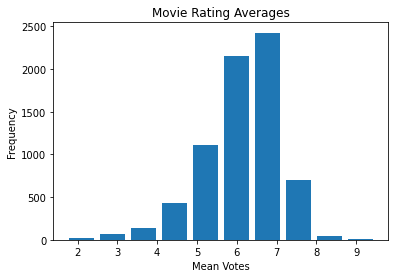

In [186]:
# Average rating of all movies
import matplotlib.pyplot as plt

plt.hist(df['mean_vote'], rwidth=.8)

plt.xlabel('Mean Votes')
plt.ylabel('Frequency')
plt.title(r'Movie Rating Averages')

plt.show()

In [187]:
df['mean_vote'].mean()

6.132323089935133

In [195]:
name_mean = df.groupby('name')['mean_vote'].mean()
top_five = name_mean.nlargest(n=5)
top_five

name
Daryush Shokof          9.240000
Petar B. Vasilev        7.983333
James Snider            7.750000
E.V.V. Satyanarayana    7.683333
Hugh Bennett            7.640000
Name: mean_vote, dtype: float64

In [190]:
shokof = df[df['name'] == "Daryush Shokof"]

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5')]

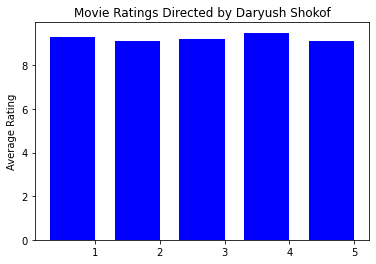

In [191]:
N = 5


Rating = (9.3, 9.1, 9.2, 9.5, 9.1) ## Fill in here##) # Percent that died in each ticket class

#This is more graphical stuff
ind = np.arange(N)  # the x locations for the groups
width = 0.7       # the width of the bars

#Create the plot
fig, ax = plt.subplots()
ax.bar(ind, Rating, width, color='b')
# ax = df.plot.bar(stacked=True)

# add some text for labels, title and axes ticks
ax.set_ylabel('Average Rating')
ax.set_title('Movie Ratings Directed by Daryush Shokof')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1', '2', '3', '4', '5'))

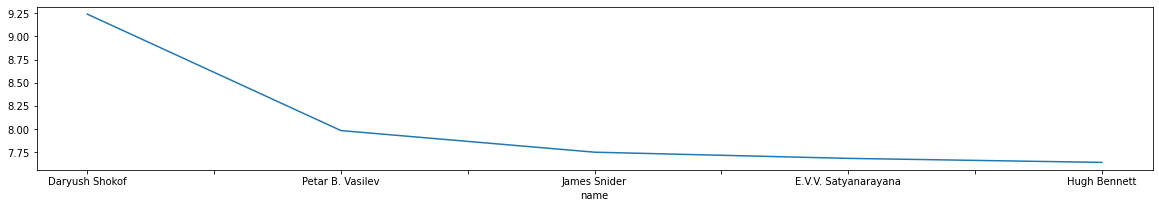

In [196]:
plt.figure();

top_five.plot(figsize=(20,3));